<a href="https://colab.research.google.com/github/bishair/Model/blob/main/GW1Model-FeaturesUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install tensorflow pandas scikit-learn matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import os
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
# Prompt the user to select a file from their local computer
uploaded = files.upload()

Saving G1F.csv to G1F (2).csv


In [41]:
# Get a list of all files in the current working directory (where uploaded files are located)
uploaded_files = os.listdir()

# Print the list of uploaded files
print("Uploaded files:")
for file in uploaded_files:
    print(file)

Uploaded files:
.config
G1F.csv
G1F (1).csv
G1F (2).csv
sample_data


In [42]:
#os.remove("")

In [43]:
data = pd.read_csv('G1F.csv', delimiter=';')

In [44]:
data.head()

,date,G1,RiverLevel,Recharge,Precipitation
0,02/06/2014,"110,738","110,659","5,00E-09",0
1,03/06/2014,"110,658","110,49","5,00E-09",0
2,04/06/2014,"110,563","110,391","5,00E-09",0
3,05/06/2014,"110,498","110,292","5,00E-09",0
4,06/06/2014,"110,428","110,234","5,00E-09",0


In [45]:
# RplacE commas with dots in excel
for col in ['G1', 'RiverLevel', 'Recharge', 'Precipitation']:
    data[col] = pd.to_numeric(data[col].str.replace(',', '.'), errors='coerce')

# Handle missing values (if any)
data = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
#Use fit_transform => calculate max and min for each feature and scale according to these values
data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']] = scaler.fit_transform(data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']])
print(data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']])

# Split the data into features and target
X = data[['RiverLevel', 'Recharge', 'Precipitation']]
y = data['G1']
print('X',X)
print('y',y)
# Split the data into training (80%) and testing sets. Shuffle the dataset before splitting it into training and test sets to remove order bias
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

           G1  RiverLevel  Recharge  Precipitation
0    0.996575    0.864353       0.0       0.000000
1    0.941781    0.775499       0.0       0.000000
2    0.876712    0.723449       0.0       0.000000
3    0.832192    0.671399       0.0       0.000000
4    0.784247    0.640904       0.0       0.000000
..        ...         ...       ...            ...
104  0.743151    0.872766       0.0       0.010638
105  1.000000    1.000000       0.0       0.000000
106  0.976027    0.926393       0.0       0.000000
107  0.986301    0.904837       0.0       0.000000
108  0.921233    0.778128       0.0       0.000000

[109 rows x 4 columns]
X      RiverLevel  Recharge  Precipitation
0      0.864353       0.0       0.000000
1      0.775499       0.0       0.000000
2      0.723449       0.0       0.000000
3      0.671399       0.0       0.000000
4      0.640904       0.0       0.000000
..          ...       ...            ...
104    0.872766       0.0       0.010638
105    1.000000       0.0       0.

In [46]:
# Model
#input will be arrays with a number of elements equal to the number of features. shape(rows(noOfSamples), columns(no.ofFeatures) )
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),    #First hidden layer
    Dense(64, activation='relu'),                                       #Second hidden layer
    Dense(1)                                                            #Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
# Train the model
#entire dataset will be passed through the neural network 100 times
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"MSE: {loss}")

Epoch 1/100
3/3 [==============================] - 1s 70ms/step - loss: 0.1307 - val_loss: 0.1866
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0994 - val_loss: 0.1422
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0743 - val_loss: 0.1049
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0529 - val_loss: 0.0765
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0380 - val_loss: 0.0560
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0292 - val_loss: 0.0413
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0225 - val_loss: 0.0318
Epoch 8/100
3/3 [==============================] - 0s 54ms/step - loss: 0.0197 - val_loss: 0.0259
Epoch 9/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0178 - val_loss: 0.0228
Epoch 10/100
3/3 [==============================] - 0s 50ms/step - loss: 0.0167 - val_loss: 0.0210
Epoch 11/100
3/3 [=

1/1 [==============================] - 0s 115ms/step
Mean Squared Error: 0.011303422033931044


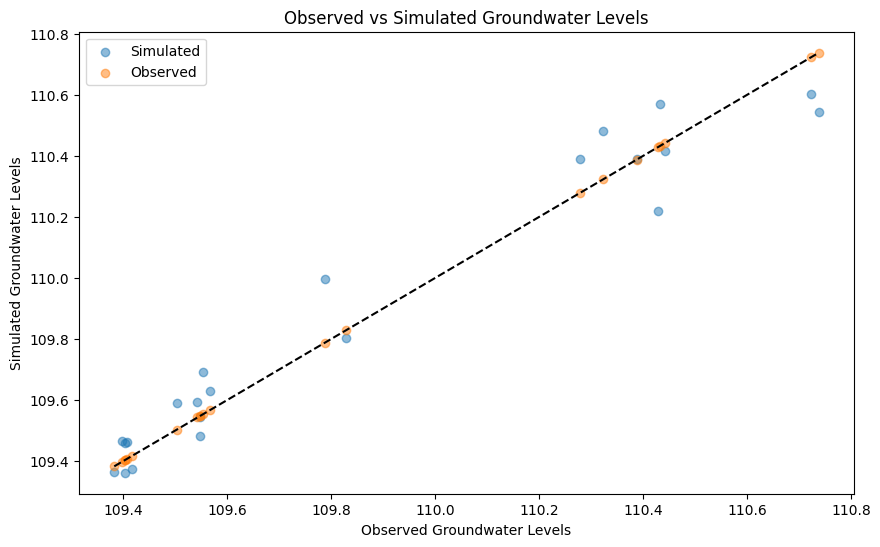

In [48]:

# Predict the groundwater levels on the test set
y_pred = model.predict(X_test).flatten()

# Create a DataFrame using test set features (excluding the target column) for the dummy data
dummy_data = X_test.copy()

# Add the predicted values as the target column (assuming 'G1' is the target)
dummy_data['G1'] = y_pred

# Apply inverse_transform to this DataFrame
rescaled_dummy_df = scaler.inverse_transform(dummy_data)

# Extract the rescaled predictions (assuming 'G1' is the first column)
y_pred_original = rescaled_dummy_df[:, 0]

# Extract the original y_test values
# Since 'G1' in 'data' is normalized, use the inverse_transform method to get the original y_test values
y_test_original_df = pd.DataFrame(data.loc[y_test.index, ['G1', 'RiverLevel', 'Recharge', 'Precipitation']], columns=['G1', 'RiverLevel', 'Recharge', 'Precipitation'])
y_test_original = scaler.inverse_transform(y_test_original_df)[:, 0]

# Calculate Mean Squared Error in original scale
mse_original = mean_squared_error(y_test_original, y_pred_original)
print(f"Mean Squared Error: {mse_original}")

# Plotting actual vs. predicted values in original scale
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5, label='Simulated')
plt.scatter(y_test_original, y_test_original, alpha=0.5, label='Observed')
plt.xlabel('Observed Groundwater Levels')
plt.ylabel('Simulated Groundwater Levels')
plt.title('Observed vs Simulated Groundwater Levels')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--') # Diagonal line
plt.legend()
plt.show()


